In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,KFold
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from lightgbm import plot_importance
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./data/mushroom_train.csv", encoding="utf-8")
test_df = pd.read_csv("./data/mushroom_test.csv", encoding="utf-8")

In [ ]:
df = pd.concat([train_df, test_df]).reset_index(drop=True)
df

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [12]:
df.nunique()

mushroom_id                 8124
class                          2
cap-shape                      6
cap-surface                    4
cap-color                     10
bruises                        2
odor                           9
gill-attachment                2
gill-spacing                   2
gill-size                      2
gill-color                    12
stalk-shape                    2
stalk-root                     5
stalk-surface-above-ring       4
stalk-surface-below-ring       4
stalk-color-above-ring         9
stalk-color-below-ring         9
veil-type                      1
veil-color                     4
ring-number                    3
ring-type                      5
spore-print-color              9
population                     6
habitat                        7
dtype: int64

<Axes: xlabel='gill-color', ylabel='count'>

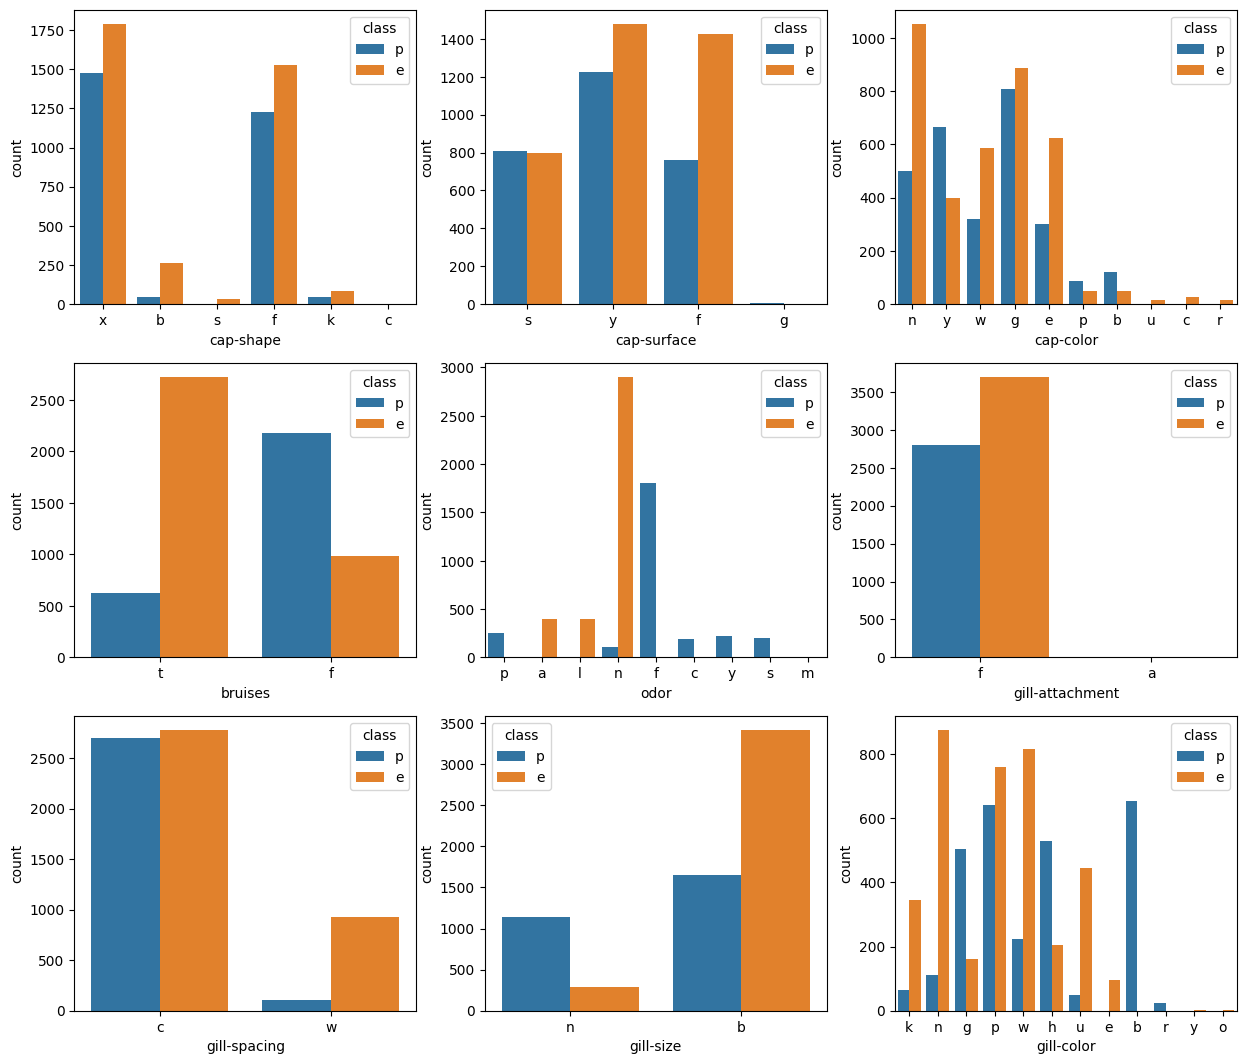

In [21]:
plt.figure(figsize=(15,13))

plt.subplot(3,3,1)
sns.countplot(data = df, x = 'cap-shape', hue = 'class')

plt.subplot(3,3,2)
sns.countplot(data = df, x = 'cap-surface', hue = 'class')

plt.subplot(3,3,3)
sns.countplot(data = df, x = 'cap-color', hue = 'class')

plt.subplot(3,3,4)
sns.countplot(data = df, x = 'bruises', hue = 'class')

plt.subplot(3,3,5)
sns.countplot(data = df, x = 'odor', hue = 'class')

plt.subplot(3,3,6)
sns.countplot(data = df, x = 'gill-attachment', hue = 'class')

plt.subplot(3,3,7)
sns.countplot(data = df, x = 'gill-spacing', hue = 'class')

plt.subplot(3,3,8)
sns.countplot(data = df, x = 'gill-size', hue = 'class')

plt.subplot(3,3,9)
sns.countplot(data = df, x = 'gill-color', hue = 'class')


In [ ]:
# 사이즈 설정
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))

capShape_bar = sns.countplot(x="cap-shape", hue="class", data=df, ax=axes[0][0])

capSurface_bar = sns.countplot(x="cap-surface", hue="class", data=df, ax=axes[0][1])

capColor_bar = sns.countplot(x="cap-color", hue="class", data=df, ax=axes[0][2])

bruises_bar = sns.countplot(x="bruises", hue="class", data=df, ax=axes[1][0])
# bruises_bar.set_xticklabels(["True", "False"])

odor_bar = sns.countplot(x="odor", hue="class", data=df, ax=axes[1][1])

gillAttachment_bar = sns.countplot(x="gill-attachment", hue="class", data=df, ax=axes[1][2])

gillSpacing_bar = sns.countplot(x="gill-spacing", hue="class", data=df, ax=axes[2][0])

gillSize_bar = sns.countplot(x="gill-size", hue="class", data=df, ax=axes[2][1])

gillColor_bar = sns.countplot(x="gill-color", hue="class", data=df, ax=axes[2][2])

fig.tight_layout()
plt.show()

In [ ]:
# 사이즈 설정
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))

stalkShape_bar = sns.countplot(x="stalk-shape", hue="class", data=df, ax=axes[0][0])

stalkRoot_bar = sns.countplot(x="stalk-root", hue="class", data=df, ax=axes[0][1])

stalkSurARing_bar = sns.countplot(x="stalk-surface-above-ring", hue="class", data=df, ax=axes[0][2])

stalkSurBRing_bar = sns.countplot(x="stalk-surface-below-ring", hue="class", data=df, ax=axes[1][0])

stalkCoARing_bar = sns.countplot(x="stalk-color-above-ring", hue="class", data=df, ax=axes[1][1])

stalkCoBRing_bar = sns.countplot(x="stalk-color-below-ring", hue="class", data=df, ax=axes[1][2])

veilType_bar = sns.countplot(x="veil-type", hue="class", data=df, ax=axes[2][0])

veilColor_bar = sns.countplot(x="veil-color", hue="class", data=df, ax=axes[2][1])

class_bar = sns.countplot(x="class", data=df, ax=axes[2][2])

fig.tight_layout()
plt.show()

In [ ]:
# 사이즈 설정
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

ringNumber_bar = sns.countplot(x="ring-number", hue="class", data=df, ax=axes[0][0])

ringType_bar = sns.countplot(x="ring-type", hue="class", data=df, ax=axes[0][1])

sporePColor_bar = sns.countplot(x="spore-print-color", hue="class", data=df, ax=axes[0][2])

population_bar = sns.countplot(x="population", hue="class", data=df, ax=axes[1][0])

habitat_bar = sns.countplot(x="habitat", hue="class", data=df, ax=axes[1][1])

fig.tight_layout()
plt.show()

In [ ]:
df_bar = df.select_dtypes('object').nunique()

plt.figure(figsize=(15,8))
plt.xticks(rotation=45,fontsize=11)
plt.bar(df_bar.index,df_bar.values)

In [ ]:
df = pd.get_dummies(data=df, columns=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat'], drop_first=True)
df = df*1
df

In [12]:
train_df = df[:6500]
test_df = df[6500:]

In [19]:
train_df.shape

(6500, 97)

In [21]:
test_df.shape

(1624, 96)

In [ ]:
test_df = test_df.drop(["class_p"],axis=1)
x_train = train_df.drop(['mushroom_id','class_p'],axis=1)
y_train = train_df['class_p']
x_test = test_df.drop(['mushroom_id'],axis=1)

In [26]:
stratified_kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1234)

In [27]:
model = lgb.LGBMClassifier()


param_grid = { "n_estimators":[400],"max_depth":[3,5],
    "num_leaves":[10],
    "subsample": [0.8]}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_kf
)

In [29]:
grid_search.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2519, number of negative: 3331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430598 -> initscore=-0.279411
[LightGBM] [Info] Start training from score -0.279411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=LGBMClassifier(),
             param_grid={'max_depth': [3, 5], 'n_estimators': [400],
                         'num_leaves': [10], 'subsample': [0.8]})

In [30]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 400, 'num_leaves': 10, 'subsample': 0.8}

In [31]:
grid_search.best_score_

1.0

In [32]:
model = lgb.LGBMClassifier(**grid_search.best_params_)

In [33]:
model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 2799, number of negative: 3701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430615 -> initscore=-0.279341
[LightGBM] [Info] Start training from score -0.279341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(max_depth=3, n_estimators=400, num_leaves=10, subsample=0.8)

In [ ]:
y_test_pred = model.predict(x_test)
test_df["class"] = y_test_pred
test_df["class"] = test_df["class"].replace([1,0],["p","e"])
test_df[["mushroom_id","class"]].to_csv("./data/submission_mushroom_13.csv", index=False)

In [ ]:
plt.figure(figsize=(15,10))
plot_importance(model,max_num_features = 20)

In [ ]:
len(test_df[test_df["class"] =="p"])*100/len(test_df["class"])

In [ ]:
test_df['class'].nunique()

In [ ]:
counts = test_df['class'].value_counts()
total = len(test_df)
percent = counts/total * 100

In [ ]:
sns.set(style='whitegrid')
sns.barplot(
    x=percent.index,
    y=percent.values
)

In [ ]:
#끝